In [11]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms 
from keras.models import load_model
import pywt

# Enhancement

In [4]:
noisy_img=cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-OR-Train\01349.jpg")
reference_img =cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-OR-Train\00099.jpg")
denoised_img = match_histograms(noisy_img,reference_img, channel_axis=-1)


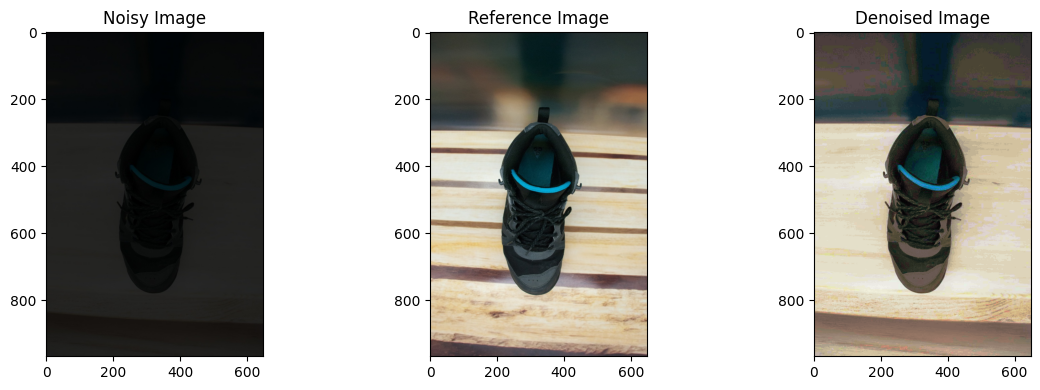

In [5]:
# Convert BGR images to RGB for proper display with matplotlib
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
denoised_img_rgb = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(noisy_img_rgb)
plt.title('Noisy Image')

plt.subplot(132)
plt.imshow(reference_img_rgb)
plt.title('Reference Image')

plt.subplot(133)
plt.imshow(denoised_img_rgb)
plt.title('Denoised Image')

plt.tight_layout()
plt.show()

# Deep learning 

In [7]:
model_path = 'Models\model_SIDD.h5'
model = load_model(model_path)

In [ ]:
noisy_img=cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-OR-Train\01349.jpg")
reference_img =cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-OR-Train\00099.jpg")
denoised_img = match_histograms(noisy_img,reference_img, channel_axis=-1)


# NLMeans + Wavelet

In [27]:
def nlmeans_denoise(image, h=3, templateWindowSize=7, searchWindowSize=21):
    # Perform Non-Local Means Denoising using OpenCV
    return cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, searchWindowSize)

def wavelet_denoise(img, threshold=20):

    channels = cv2.split(img)

    # Apply wavelet denoising to each channel independently
    denoised_channels = []
    for channel in channels:
        # Perform 2D wavelet transform
        coeffs = pywt.dwt2(channel, 'bior1.3')

        # Thresholding: Set small coefficients to zero
        coeffs = tuple(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))

        # Inverse 2D wavelet transform
        denoised_channel = pywt.idwt2(coeffs, 'bior1.3')

        # Clip values to be in the valid range [0, 255]
        denoised_channel = np.clip(denoised_channel, 0, 255)

        # Convert to uint8 (required for image display)
        denoised_channel = denoised_channel.astype(np.uint8)

        denoised_channels.append(denoised_channel)

    # Merge the denoised channels back into an RGB image
    denoised_img = cv2.merge(denoised_channels)

    return denoised_img

def combine_denoising_methods(image):

    # Apply NLMeans denoising
    nlmeans_denoised = nlmeans_denoise(image)

    # Apply wavelet denoising
    wavelet_denoised = wavelet_denoise(image)

    nlmeans_denoised = np.array(nlmeans_denoised)
    wavelet_denoised = np.array(wavelet_denoised)

    nlmeans_denoised_norm = nlmeans_denoised / 255.0
    wavelet_denoised_norm = wavelet_denoised / 255.0


    # Combine the results (you can experiment with different blending strategies)
    combined_denoised_norm = 0.2 * nlmeans_denoised_norm + 0.8 * wavelet_denoised_norm

    combined_denoised = (combined_denoised_norm * 255).astype(np.uint8)

    return combined_denoised

In [34]:
noisy_img=cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-TSD\Noisy_images\01_04_01_08_02.mp4.png")
reference_img=cv2.imread(r"C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\CURE-TSD\Ground_truths\01_04_00_00_00.mp4.png")
denoised_img = combine_denoising_methods(noisy_img)

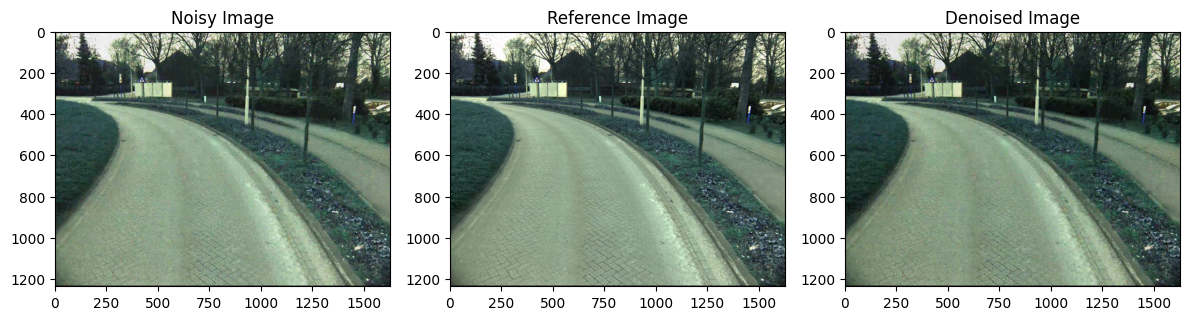

In [35]:
# Convert BGR images to RGB for proper display with matplotlib
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
denoised_img_rgb = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(noisy_img_rgb)
plt.title('Noisy Image')

plt.subplot(132)
plt.imshow(reference_img_rgb)
plt.title('Reference Image')

plt.subplot(133)
plt.imshow(denoised_img_rgb)
plt.title('Denoised Image')

plt.tight_layout()
plt.show()